# 340-Plotting and Fitting Data
This is the same set of data and fitting function as in the "Intro to Matlab" document.

## Data and error bars

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


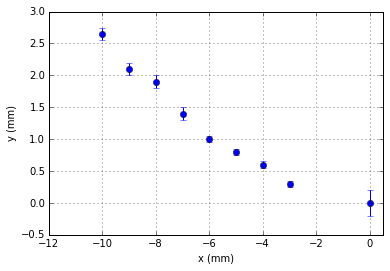

In [2]:
# mathematical routines are expecting 'array'
x = array([-10, -9, -8, -7, -6, -5, -4, -3, 0]);
y = array([2.65, 2.10, 1.90, 1.40, 1.00, 0.80, 0.60, 0.30, 0.00]);
ey = array([0.1, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.2]);
# Plot the data with error bars		
errorbar(x,y,ey,linestyle = '',marker = 'o') # no connecting line, circle
# Don’t forget axes labels
xlabel('x (mm)')
ylabel('y (mm)')
axis([-12,0.5,-0.5,3])
grid(True)

## Fitting function to the data

For physical reasons we expect our data is described by a circle.  
The equation of a circle with radius $a$ centered at $(x,y)=(b,c)$ is given by
$$(x-b)^2+(y-c)^2 = a^2$$
Let's rewrite this in terms of $y$,
$$y=-\sqrt{a^2-(x-b)^2}+c$$
We define the function and then want to find the best estimates for $a, b, c$ consistent with our data.

In [3]:
def myfun(x,a,b,c):
    ans = -sqrt(a**2-(x-b)**2)+c  # this is y, "the function to be fit"
    return ans

Here are the initial guesses for the parameters $a$, $b$, and $c$ to pass to the fitting function.

In [4]:
p0 = [15, 0, 15]

The 'curve_fit' function gets the best y by adjusting the parameters 'p'.

In [5]:
from scipy.optimize import curve_fit  # import the curve fitting function
plsq, pcov = curve_fit(myfun, x, y, p0, ey)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
print('a = %.3f +/- %.3f' % (plsq[0], sqrt(pcov[0,0])))
print('b = %.3f +/- %.3f' % (plsq[1], sqrt(pcov[1,1])))
print('c = %.3f +/- %.3f' % (plsq[2], sqrt(pcov[2,2])))

a = 26.754 +/- 5.227
b = 1.767 +/- 1.550
c = 26.666 +/- 5.019


Now we use the fitted parameters in our function to compare with the data.

In [6]:
xlots = linspace(-11,0.5)  # need lots of data points for smooth curve
yfit = myfun(xlots,plsq[0],plsq[1],plsq[2])  # use fit results for a, b, c

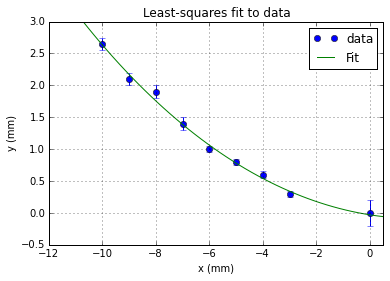

In [7]:
errorbar(x,y,ey,linestyle = '',marker = 'o')
xlabel('x (mm)')
ylabel('y (mm)')
plot(xlots,yfit)
title('Least-squares fit to data')
legend(['data','Fit'])
axis([-12,0.5,-0.5,3])
grid(True)